<a href="https://colab.research.google.com/github/ipaliotti/MLPNS_IPaliotti/blob/main/StellarPopClusterLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import preprocessing
import scipy as sp
from scipy import spatial
import numpy as np
from sklearn import cluster

In [4]:
cmag=pd.read_csv("https://raw.githubusercontent.com/fedhere/"
              "MLPNS_FBianco/main/clustering/colormag_NGC2808.csv", header=None)
cmag


,0,1
0,-0.286449,19.920797
1,-0.273440,20.197264
2,-0.270112,19.915151
3,-0.243489,20.285819
4,-0.213538,19.689023
...,...,...
596,1.540265,17.014947
597,1.540265,18.009830
598,1.540265,19.012137
599,1.540265,20.007020


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Figure size 500x500 with 0 Axes>

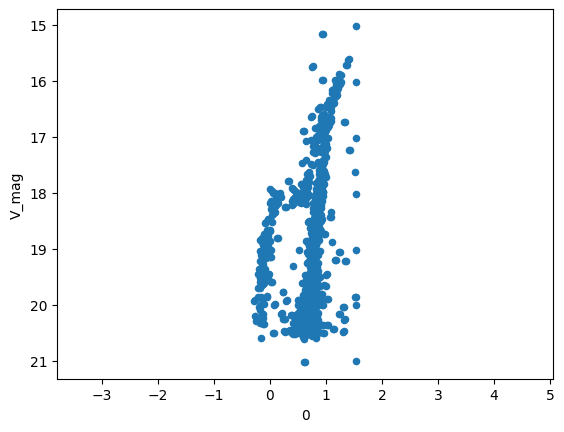

In [7]:
pl.figure(figsize=(5,5))
ax=cmag.plot(x=0, y=1, kind='scatter')

ax.set_xlabel=("B-V(color)")
ax.set_ylabel("V_mag")
ax.axis('equal')

pl.gca().invert_yaxis();

#ho delle scale diverse quindi devo preoccuparmi

In [12]:
cmag_scaled= preprocessing.scale(cmag,axis=0)

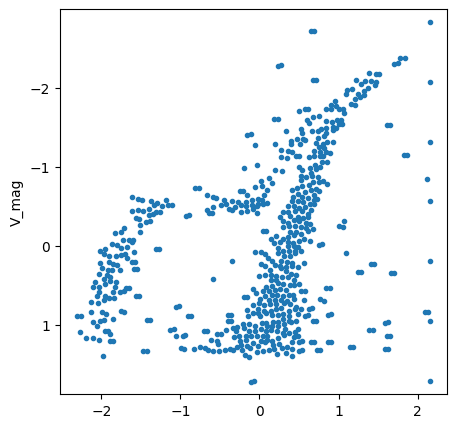

In [13]:
ax=pl.figure(figsize=(5,5)).add_subplot(111)
ax.plot(cmag_scaled[:,0], cmag_scaled[:,1], '.')


ax.set_xlabel=("B-V(color)")
ax.set_ylabel("V_mag")
ax.axis('equal')

pl.gca().invert_yaxis();

In [15]:
model=cluster.KMeans(n_clusters=3, random_state=302)


In [16]:
model.fit(cmag_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=302)

In [18]:
model.labels_



array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0,
       2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [22]:
model.cluster_centers_

array([[ 0.2930383 ,  0.77187379],
       [ 0.62251398, -1.09094667],
       [-1.61167123,  0.31291912]])

In [23]:
model.inertia_

336.09752492000223

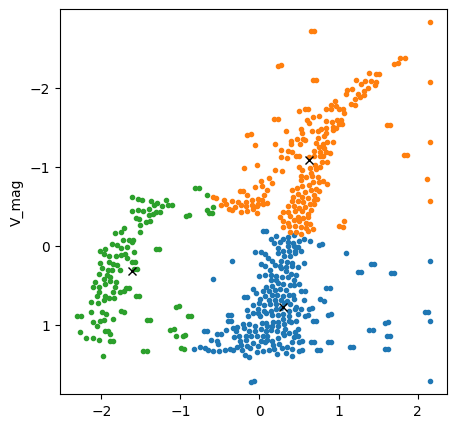

In [25]:
ax=pl.figure(figsize=(5,5)).add_subplot(111)
for i in range(3):

  ax.plot(cmag_scaled[model.labels_==i, 0], cmag_scaled[model.labels_==i, 1], '.')
  ax.plot(model.cluster_centers_[i,0],model.cluster_centers_[i,1],'kx')


ax.set_xlabel=("B-V(color)")
ax.set_ylabel("V_mag")
ax.axis('equal')

pl.gca().invert_yaxis();

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0.5, 0, 'n clusters')

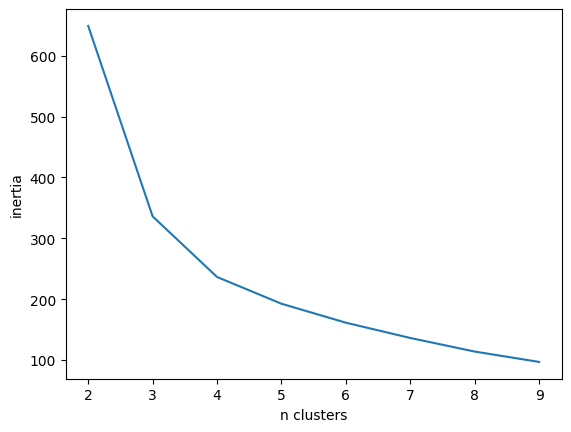

In [26]:
inertias = []
for nc in range(2, 10):
  model = cluster.KMeans(n_clusters=nc, random_state=302).fit(cmag_scaled)
  inertias.append(model.inertia_)

pl.plot(range(2,10), inertias)
pl.ylabel("inertia")
pl.xlabel("n clusters")

In [27]:
modeldbs = cluster.DBSCAN(eps=0.001).fit(cmag_scaled)

In [28]:
modeldbs.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

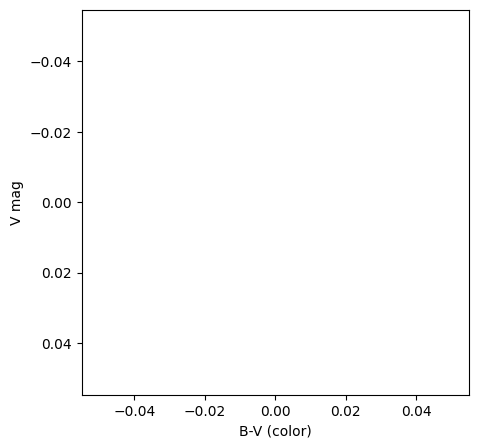

In [29]:
ax = pl.figure(figsize=(5,5)).add_subplot(111)
for i in range(3):
  ax.plot(cmag_scaled[modeldbs.labels_==i,0], cmag_scaled[modeldbs.labels_==i,1], '.')
ax.set_xlabel("B-V (color)")
ax.set_ylabel("V mag")
ax.axis('equal')
pl.gca().invert_yaxis();

In [30]:
for e in np.arange(0.001,1,0.001):
  modeldbs=cluster.DBSCAN(eps=e).fit(cmag_scaled)
  if modeldbs.labels_.max() > 0:
    print(e, modeldbs.labels_.max())

0.067 1
0.068 4
0.069 5
0.07 5
0.07100000000000001 7
0.07200000000000001 8
0.07300000000000001 10
0.074 13
0.075 14
0.076 16
0.077 21
0.078 22
0.079 21
0.08 18
0.081 15
0.082 13
0.083 14
0.084 14
0.085 15
0.08600000000000001 14
0.08700000000000001 13
0.08800000000000001 12
0.089 12
0.09 12
0.091 13
0.092 14
0.093 15
0.094 16
0.095 15
0.096 16
0.097 17
0.098 16
0.099 14
0.1 12
0.101 12
0.10200000000000001 11
0.10300000000000001 11
0.10400000000000001 11
0.10500000000000001 12
0.106 12
0.107 11
0.108 11
0.109 10
0.11 10
0.111 11
0.112 10
0.113 10
0.114 9
0.115 9
0.116 9
0.117 9
0.11800000000000001 10
0.11900000000000001 9
0.12000000000000001 9
0.121 9
0.122 9
0.123 9
0.124 9
0.125 8
0.126 8
0.127 9
0.128 9
0.129 9
0.13 9
0.131 9
0.132 7
0.133 7
0.134 7
0.135 7
0.136 6
0.137 5
0.138 5
0.139 5
0.14 5
0.14100000000000001 4
0.14200000000000002 4
0.14300000000000002 4
0.14400000000000002 4
0.14500000000000002 4
0.146 4
0.147 4
0.148 4
0.149 4
0.15 4
0.151 4
0.152 4
0.153 4
0.154 4
0.155 3
0.1

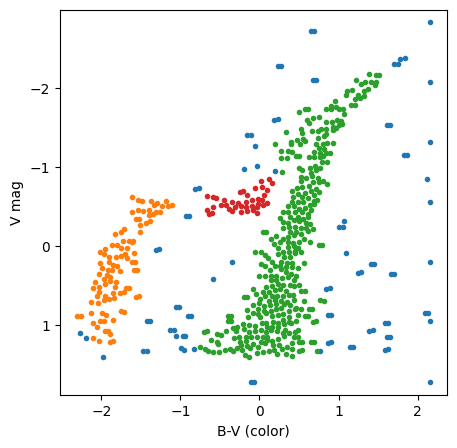

In [31]:
modeldbs=cluster.DBSCAN(eps=0.2, min_samples=10).fit(cmag_scaled)
ax = pl.figure(figsize=(5,5)).add_subplot(111)
for i in np.unique(modeldbs.labels_):
  ax.plot(cmag_scaled[modeldbs.labels_==i,0], cmag_scaled[modeldbs.labels_==i,1], '.')
ax.set_xlabel("B-V (color)")
ax.set_ylabel("V mag")
ax.axis('equal')
pl.gca().invert_yaxis();